### 本教程包含以下内容： 1、如何安装mmcls 2、使用原始模型进行推理 3、基于预训练模型进行微调

## 安装MMClassification
    使用之前，配置必须环境，如下：
        1、安装python，CUDA，C/C++ compiler 和 git
        2、安装Pytorch(Cuda版本)
        3、安装mmcv
        4、下载mmcls代码并安装

In [ ]:
#官方文档
#  https://mmclassification.readthedocs.io/zh_CN/latest/

In [ ]:
#创建新环境
# %conda create -n mmcls python==3.8 -y

In [ ]:
#激活环境,该步骤在jupyter中先配置，然后手动切换
#source activate mmcls    #激活创建的环境
#pip install ipykernel    #安装ipykernel
#/home/snnu/miniconda3/envs/mmcls/bin/python -m ipykernel install --user --name mmcls   #ipykernel中注册新环境
#重启jupyter服务，选择创建好的mmcls环境

In [1]:
#检查环境
%ls

mmclassification/
MMClassification Python 教程1.ipynb
mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
pythonApiTest.ipynb


In [2]:
#查看nvcc版本
! nvcc -V           #nvcc当前是10.2

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Wed_Oct_23_19:24:38_PDT_2019
Cuda compilation tools, release 10.2, V10.2.89


In [3]:
!which python

/home/snnu/miniconda3/envs/mmcls/bin/python


In [2]:
#安装torch1.8
# !pip install torchvision==0.9
#该步骤查看官网安装，需要版本匹配     https://pytorch.org/get-started/previous-versions/

     |████████████████████████████████| 17.3 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 15.7 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 735.5 MB 31 kB/s  eta 0:00:01
  Using cached Pillow-8.4.0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.1 MB)
  Using cached typing_extensions-3.10.0.2-py3-none-any.whl (26 kB)


In [4]:
#检查GCC版本
!gcc --version

gcc (Ubuntu 5.5.0-12ubuntu1~16.04) 5.5.0 20171010
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
#检查torch
import torch, torchvision
print(torch.__version__)
torch.cuda.is_available()

1.8.1+cu102


True

## 安装mmcv
    MMCV是OpenMMLab系列代码的基础库。Linux环境安装的whl包又打包好的，相对较容易，可以直接下载安装
     特别注意需要和Pytorch 和 CUDA版本对应，才能确保安装，安装过程出现ERROR的红色字样均需要卸载重新安装
     当前机器版本为Torch 1.8.0 CUDA 10.2 ，安装相应的版本

In [6]:
# 安装mmcv
#使用简单功能使用下命令
#!pip install mmcv -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.8.0/index.html
#安装完全版本
#!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu102/torch1.8.1/index.html
    
#安装只需要修改cuda版本和torch版本即可，当前安装的是mmcv-full

In [ ]:
#克隆mmcls项目代码并安装MMCLS
# !git clone https://github.com/open-mmlab/mmclassification.git
#国内网不好时又两种解决方式
#方法一： 先使用本地浏览器或pycharm下载，下载不了时开vpn
#方法二： 使用码云，远程clone至码云后再clone

正克隆到 'mmclassification'...


In [7]:
%cd mmclassification/

/home/snnu/chenkequan/notebooke/mmcls/mmclassification


In [8]:
%ls

checkpoints/  docs/        mmcls.egg-info/  requirements.txt  tools/
CITATION.cff  docs_zh-CN/  model-index.yml  resources/
configs/      LICENSE      README.md        setup.cfg
demo/         MANIFEST.in  README_zh-CN.md  setup.py
docker/       mmcls/       requirements/    tests/


# 介绍下目录功能
    configs ：存放众多配置文件
    mmcls : 分类模块化构建代码
    requirements: 依赖
    tests : 测试推理
    tools：工具类
    demo ： 样例
    resources：图像资料

In [3]:
#安装依赖
#!pip install -e .

Obtaining file:///home/snnu/chenkequan/notebooke/mmcls/mmclassification
  Using cached matplotlib-3.4.3-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached kiwisolver-1.3.2-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Running setup.py develop for mmcls


In [9]:
#检查安装是否成功
import mmcls
mmcls.__version__

'0.17.0'

# 使用MMCls原生预训练模型实现推理
   MMCls 提供很多预训练模型， [模型库](https://mmclassification.readthedocs.io/zh_CN/latest/model_zoo.html) 这些预训练模型已经有 state-of-the-art 的结果，可以直接推理.
   1. 使用需要做以下准备工作：
       - 准备模型
           - 准备config配置文件
           - 准备预训练权重参数文件
       - 构建模型
       - 进行推理
   
           

In [44]:
# 下载一张图片
#!wget 'tupian.qqw21.com/article/UploadPic/2020-8/202082221484445299.jpg'

In [47]:
%ls demo/
# %rm demo/cat.jpg
%ls
%mv 202082221484445299.jpg demo/


demo.JPEG  image_demo.py
202082221484445299.jpg  docs/        mmcls.egg-info/  requirements.txt  tools/
CITATION.cff            docs_zh-CN/  model-index.yml  resources/
configs/                LICENSE      README.md        setup.cfg
demo/                   MANIFEST.in  README_zh-CN.md  setup.py
docker/                 mmcls/       requirements/    tests/


In [10]:
%ls demo/

202082221484445299.jpg  demo.JPEG  image_demo.py


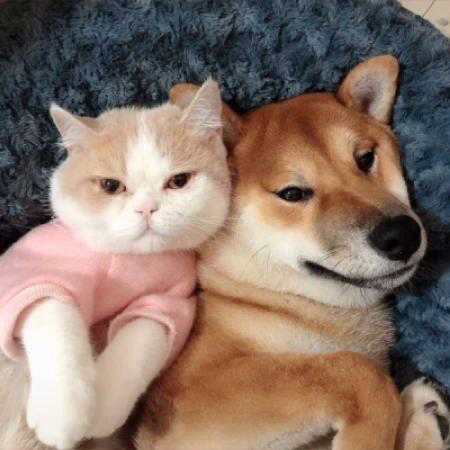

In [11]:
from PIL import Image
Image.open('demo/202082221484445299.jpg')

In [12]:
%cat configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py

In [ ]:
# 使用mobilnet进行推理，上面配置文件为 python列表，引用了其他文件的配置

In [13]:
!wget -h

GNU Wget 1.17.1，非交互式的网络文件下载工具。
用法： wget [选项]... [URL]...

长选项所必须的参数在使用短选项时也是必须的。

启动：
  -V,  --version                   显示 Wget 的版本信息并退出
  -h,  --help                      打印此帮助
  -b,  --background                启动后转入后台
  -e,  --execute=命令              运行一个“.wgetrc”风格的命令

日志和输入文件：
  -o,  --output-file=文件          将日志信息写入 FILE
  -a,  --append-output=文件        将信息添加至 FILE
  -d,  --debug                     打印大量调试信息
  -q,  --quiet                     安静模式 (无信息输出)
  -v,  --verbose                   详尽的输出 (此为默认值)
  -nv, --no-verbose                关闭详尽输出，但不进入安静模式
       --report-speed=类型         以 <类型> 报告带宽。类型可以是 bits
  -i,  --input-file=文件           下载本地或外部 <文件> 中的 URL
  -F,  --force-html                把输入文件当成 HTML 文件
  -B,  --base=URL                  解析相对于 URL 的 HTML 输入文件链接 (-i -F)
       --config=文件               指定要使用的配置文件
       --no-cookies                不读取任何配置文件
       --rejected-log=文件         将拒绝 URL 的原因写入 <文件>。

下载：
  -t,  --tries=数字                设置重试次数为 <数字> (0 代表无限制)
   

In [58]:
# 下载预训练模型
!mkdir checkpoints
!wget https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth -P checkpoints/

mkdir: 无法创建目录"checkpoints": 文件已存在
--2021-11-10 11:06:36--  https://download.openmmlab.com/mmclassification/v0/mobilenet_v2/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth
正在解析主机 download.openmmlab.com (download.openmmlab.com)... 47.108.5.70
正在连接 download.openmmlab.com (download.openmmlab.com)|47.108.5.70|:443... 已连接。
已发出 HTTP 请求，正在等待回应... 200 OK
长度： 14206911 (14M) [application/octet-stream]
正在保存至: “checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth”

mobilenet_v2_batch2 100%[===================>]  13.55M  9.95MB/s    in 1.4s    

2021-11-10 11:06:37 (9.95 MB/s) - 已保存 “checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth” [14206911/14206911])



In [14]:
%ls checkpoints/

mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth


### 图像分类
    MMCls使用提供的python API 进行推理计算
    首先，构建模型


In [15]:
#获取当前设备cuda信息
import torch
print(torch.cuda.current_device())
print(torch.cuda.device_count())
print(torch.cuda.get_device_capability('cuda:0'))
print( torch.cuda.get_device_name('cuda:0'))
print( torch.cuda.get_device_name('cuda:1'))

0
2
(7, 5)
GeForce RTX 2080 Ti
TITAN Xp


In [16]:
from mmcls.apis import inference_model , init_model,show_result_pyplot

#指明配置文件和权重参数文件的路劲
configs_files = 'configs/mobilenet_v2/mobilenet_v2_b32x8_imagenet.py'
checkpoint_file = 'checkpoints/mobilenet_v2_batch256_imagenet_20200708-3b2dc3af.pth'

#指明使用的设备，如果没有gpu可以使用cpu，可以指定gpu哪一张卡

#通过配置文件和权重参数文件构建模型
model = init_model(configs_files, checkpoint_file,device='cuda:0')
model.cuda()

/home/snnu/miniconda3/envs/mmcls/lib/python3.8/site-packages/mmcv/cnn/bricks/transformer.py:28: UserWarning: Fail to import ``MultiScaleDeformableAttention`` from ``mmcv.ops.multi_scale_deform_attn``, You should install ``mmcv-full`` if you need this module. 
  warnings.warn('Fail to import ``MultiScaleDeformableAttention`` from '


Use load_from_local loader


/home/snnu/chenkequan/notebooke/mmcls/mmclassification/mmcls/apis/inference.py:44: UserWarning: Class names are not saved in the checkpoint's meta data, use imagenet by default.
  warnings.warn('Class names are not saved in the checkpoint\'s '


ImageClassifier(
  (backbone): MobileNetV2(
    (conv1): ConvModule(
      (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activate): ReLU6(inplace=True)
    )
    (layer1): Sequential(
      (0): InvertedResidual(
        (conv): Sequential(
          (0): ConvModule(
            (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (activate): ReLU6(inplace=True)
          )
          (1): ConvModule(
            (conv): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
      )
    )
    (layer2): Sequential(
      (0): InvertedResidual(
        (conv): Sequential(
     

In [17]:
model.__class__.__mro__

(mmcls.models.classifiers.image.ImageClassifier,
 mmcls.models.classifiers.base.BaseClassifier,
 mmcv.runner.base_module.BaseModule,
 torch.nn.modules.module.Module,
 object)

In [18]:
#推理并展示结果
img = 'demo/202082221484445299.jpg'
result = inference_model(model,img)

In [19]:
result

{'pred_label': 250,
 'pred_score': 0.10423319041728973,
 'pred_class': 'Siberian husky'}

In [20]:
#展示结果
img = 'demo/202082221484445299.jpg'
import mmcv
img_array = mmcv.imread(img)
result = inference_model(model,img_array)

In [21]:
result

{'pred_label': 250,
 'pred_score': 0.10423319041728973,
 'pred_class': 'Siberian husky'}

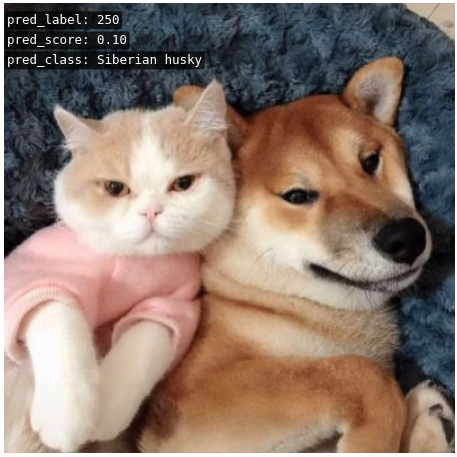

In [23]:
show_result_pyplot(model,img,result)